# 2.3.3 線形モデル
## 2.3.3.2 線形モデルによる回帰

/Users/syuheyk/.pyenv/versions/anaconda3-4.3.1/envs/py3.6.0/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


w[0]: 0.393906  b: -0.031804


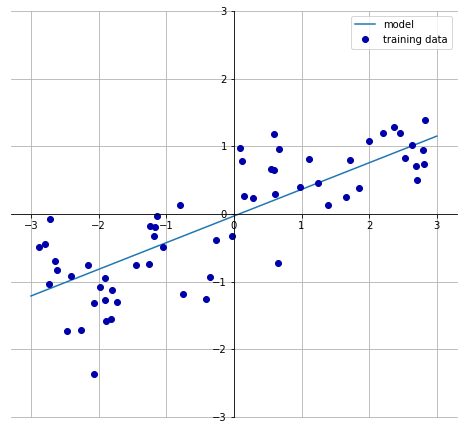

In [1]:
import matplotlib.pyplot as plt
from PyHajiMglearn import *
plot_linear_regression_wave()
plt.show()

## 2.3.3.2 線形回帰（最小二乗法）

In [2]:
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=60)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

[ 0.39390555]
-0.0318043430268
0.670089031508
0.659336859686


In [3]:
X, y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.952352643686
0.605775489294


- 訓練スコア > テストスコア となるのは，過剰適合が起きている兆候
- モデルの複雑さを制御できるリッジ回帰・lasso回帰を試してみる
## 2.3.3.3 リッジ回帰

In [4]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.88605785604
0.752713960031


- Ridgeの訓練セットに対するスコアはLinearRegressionの場合よりも低く、テストセットに対するスコアは高い
- 線形回帰ではデータに対して過剰適合していた。Ridgeは、制約の強いモデルなので、過剰適合の危険は少ない
- Ridgeモデルでは、モデルの簡潔さ（0に近い係数の数）と、訓練セットに対する性能がトレードオフの関係になる。このどちらに重きを置くかは、ユーザがalphaパラメータを用いて指定することができる
- alphaを増やすと、係数はより0に近くなり、訓練セットに対する性能は低下するが、汎化にはそちらのほうがよいかもしれない

In [5]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.788346151123
0.635896732745


In [6]:
ridge01= Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.928578208201
0.771793368884


パラメータの設定方法は「5章 モデルの評価と改善」で詳しくやります．

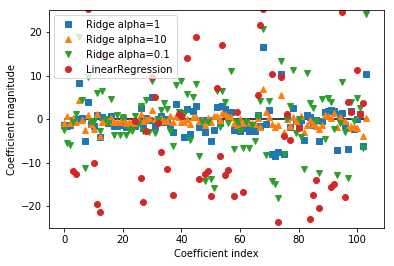

In [7]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

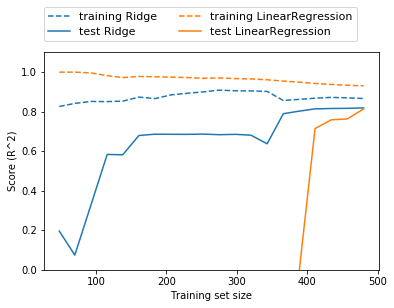

In [8]:
plot_ridge_n_samples()
plt.show()

## 2.3.3.4 Lasso

In [9]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print("N of features used:{}".format(np.sum(lasso.coef_ != 0)))

0.293237689911
0.209375032553
N of features used:4


- Lassoの性能は訓練セットに対しても、テストセットに対しても、非常に悪い。これは適合不足

In [10]:
# "max_iter"の値を増やしている。
# こうしておかないとモデルが、"max_iter"を増やすように警告を発する
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


- 性能はRidgeよりも少しだけ良いぐらいだが、105の特徴量のうち、わずか33しか使っていないことによってモデルは潜在的には理解しやすくなっている。
- alphaを小さくしすぎると、リッジの場合と同様に正則化の効果が薄れ、過剰適合が発生

In [11]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


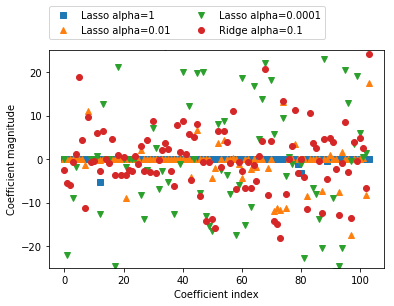

In [12]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

## 2.3.3.5 クラス分類のための線形モデル

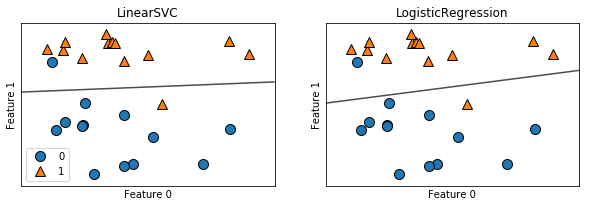

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

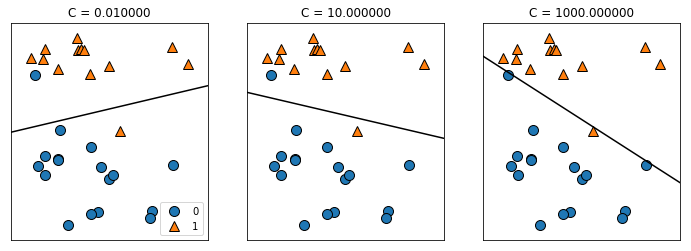

In [14]:
plot_linear_svc_regularization()
plt.show()

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [16]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


In [17]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


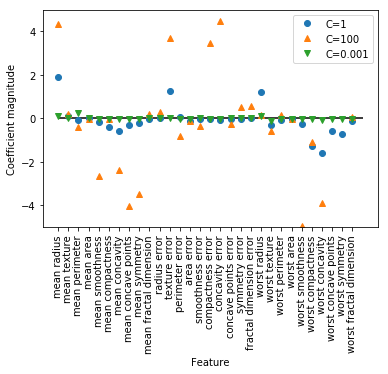

In [18]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


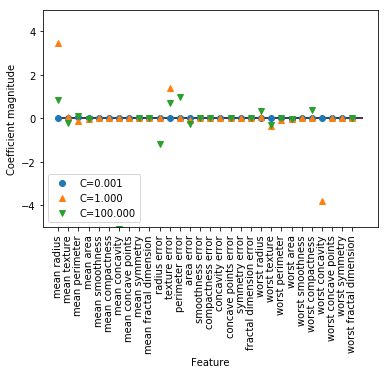

In [19]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

## 2.3.3.6 線形モデルによる多クラス分類

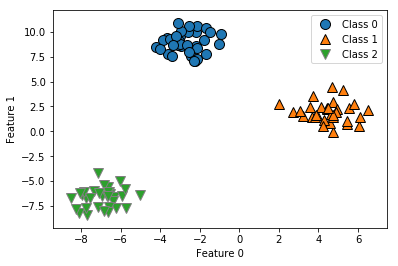

In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [21]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


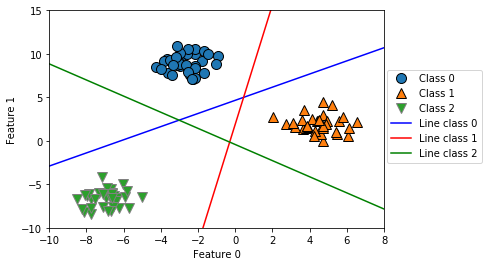

In [22]:
discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.show()

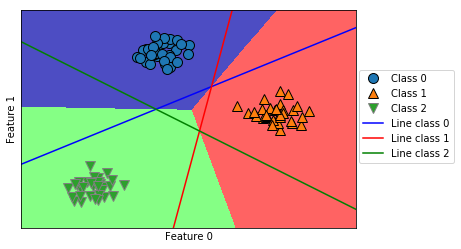

In [23]:
plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()